# Stroke Prediction 
This is an activity based of the a discription given by an anonymas souce on the data sicence website kaggle. The user went by fedesoriano. 

### Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

*The objective is to predict the licklyhood of a stroke within a dataset.* 


1Source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split #This just creates a new dataset 
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv(r'C:\Users\MATILYA\Documents\Self\ML\Kaggle\Headache\healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()
#bmi has missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
(one hot and cold but in levels) 

12) stroke: 1 if the patient had a stroke or 0 if not

#### bmi analysis 

From information I have reseach online and have heard, I dont think bmi can be used as a mediacal analysis. 

"Though it has been used for decades as the go-to measurement for your health based on your size, it has been widely criticized for its oversimplification of what being healthy really means." 
+https://www.healthline.com/nutrition/is-bmi-accurate


I will also assume the 'id' column does not add information about each patient

In [3]:
data.drop(['id','bmi'],axis =1, inplace = True)

### Data Preprocessing 

#### Categorical Data 
1. Nominal data --> data are not in any order --> OneHotEncoder is used in this case
2. Ordinal data --> data are in order --> LabelEncoder is used in this case

In [33]:
data.replace({"Female": 0, "Male": 1, "Other": 2}, inplace = True)

In [4]:
ever_married = data[['ever_married']]
ever_married = pd.get_dummies(ever_married, drop_first = True) #Drop first removes the nominal data in the o dataset 

In [5]:
work_type = data[['work_type']]
work_type = pd.get_dummies(work_type, drop_first = True)

In [6]:
Residence_type = data[['Residence_type']]
Residence_type = pd.get_dummies(Residence_type, drop_first = True)

For smoking_status I will be placing them as ordinal data as I will be assuming that the more you smoke, the higher the chance of suffering as stroke. 

(Not sure how to deal woth unknown) 

In [20]:
#smoking_status will be treated as ordinal data. This is off the asumptions the more someone smokes, the more ickly they will be
# affected by varous health risks 

data.replace({"Unknown": 0, "never smoked": 1, "formerly smoked": 2, "smokes": 3}, inplace = True)

In [34]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,2,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,1,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,1,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,3,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,1,1


In [39]:
full_data = pd.concat([data, ever_married, work_type, Residence_type], axis = 1)

In [40]:
full_data.drop(['ever_married','work_type','Residence_type'], axis = 1, inplace = True)

In [41]:
full_data.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,smoking_status,stroke,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,1,67.0,0,1,228.69,2,1,1,0,1,0,0,1
1,0,61.0,0,0,202.21,1,1,1,0,0,1,0,0
2,1,80.0,0,1,105.92,1,1,1,0,1,0,0,0
3,0,49.0,0,0,171.23,3,1,1,0,1,0,0,1
4,0,79.0,1,0,174.12,1,1,1,0,0,1,0,0


In [44]:
full_data.to_csv('Model.csv')

### Model 

In [4]:
model = pd.read_csv('Model.csv')

In [51]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
Unnamed: 0                 5110 non-null int64
gender                     5110 non-null int64
age                        5110 non-null float64
hypertension               5110 non-null int64
heart_disease              5110 non-null int64
avg_glucose_level          5110 non-null float64
smoking_status             5110 non-null int64
stroke                     5110 non-null int64
ever_married_Yes           5110 non-null int64
work_type_Never_worked     5110 non-null int64
work_type_Private          5110 non-null int64
work_type_Self-employed    5110 non-null int64
work_type_children         5110 non-null int64
Residence_type_Urban       5110 non-null int64
dtypes: float64(2), int64(12)
memory usage: 559.0 KB


In [5]:
X = model.loc[:,['gender','age','hypertension','heart_disease','avg_glucose_level','smoking_status','ever_married_Yes',
                'work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Urban']]
y = model[['stroke']]

In [61]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [6]:
#Will need to scale the avg_glucose_level. 
level = X['avg_glucose_level']
level_glu = np.array(level).reshape(-1,1)
scaler = MinMaxScaler()
avg_glucose_level = scaler.fit_transform(level_glu)
glucose_level_scale = pd.DataFrame(avg_glucose_level)
glucose_level_scale.columns = ['glucose_level_scaled']

In [7]:
#Will need to scale the age.
level_age = X['age']
level_age_scale = np.array(level_age).reshape(-1,1)
scaler = MinMaxScaler()
age = scaler.fit_transform(level_age_scale)
age_scale = pd.DataFrame(age)
age_scale.columns = ['age_scaled']

In [8]:
X = pd.concat([X, glucose_level_scale,age_scale], axis = 1)

In [9]:
X.drop(['age','avg_glucose_level'], axis =1, inplace = True)

In [119]:
X.head()

,gender,hypertension,heart_disease,smoking_status,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,glucose_level_scaled,age_scaled
0,1,0,1,2,1,0,1,0,0,1,0.801265,0.816895
1,0,0,0,1,1,0,0,1,0,0,0.679023,0.743652
2,1,0,1,1,1,0,1,0,0,0,0.234512,0.975586
3,0,0,0,3,1,0,1,0,0,1,0.536008,0.597168
4,0,1,0,1,1,0,0,1,0,0,0.549349,0.963379


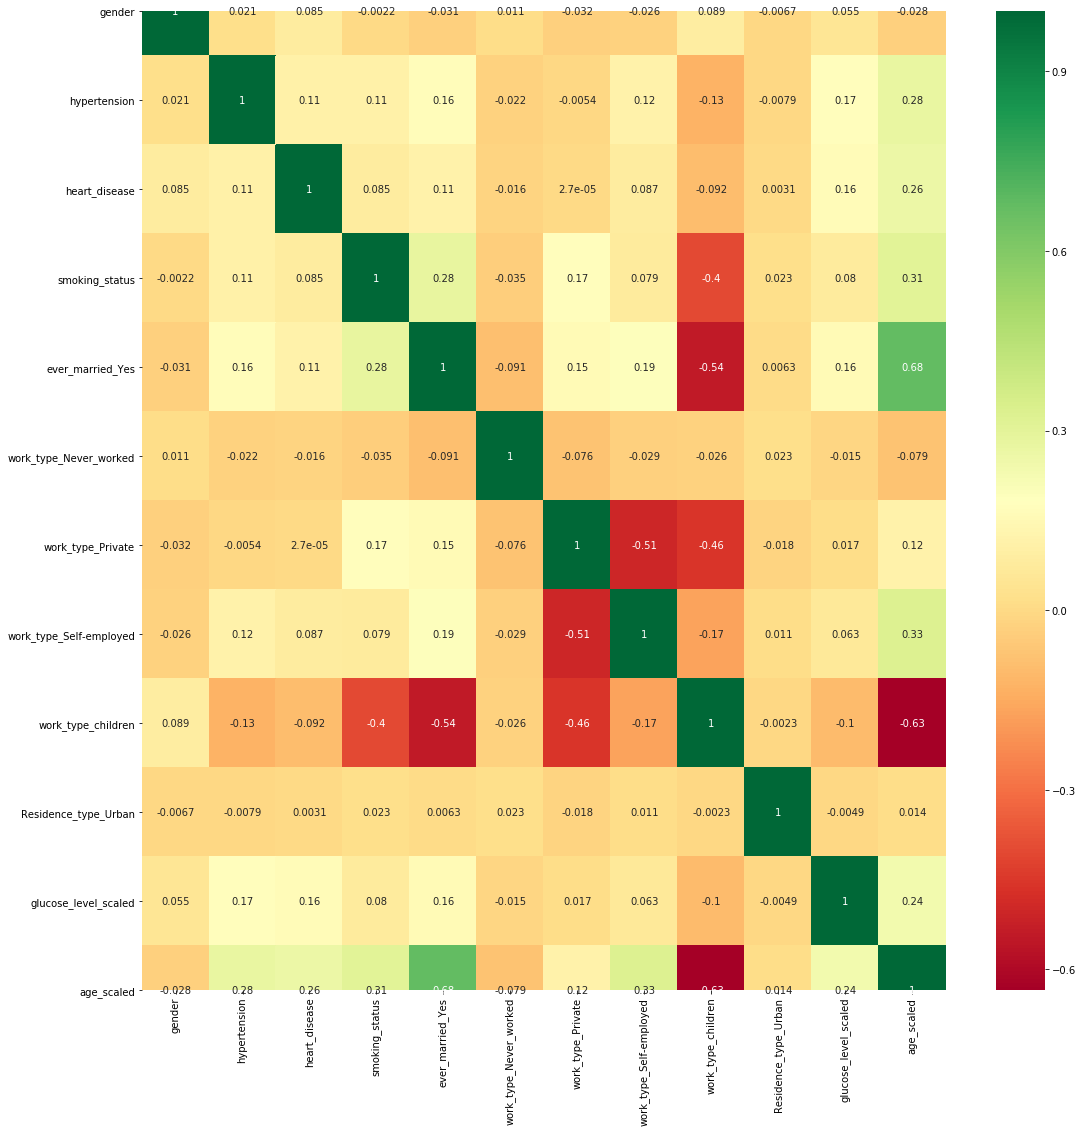

In [122]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(X.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [ ]:
#no values are too coorliated/uncoorilated

### Model creation 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #train/test split 

In [11]:
#Apply Random forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

y_train_rf_pred = rf_model.predict_proba(X_train)# keep probabilities for the positive outcome only
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, y_train_rf_pred[:,1]))) #This is the compares y_train to the second column i.e. where it redicted 1
#So if I do  ytrain_pred[:,0], the output is (1-ytrain_pred[:,1] )

ytest_rf_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_rf_pred[:,1])))

C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RF train roc-auc: 0.999759083502926
RF test roc-auc: 0.6364041339985744


In [12]:
#xgb_model
xgb_model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1)
xgb_model.fit(X_train, y_train)

ytrain_pred_xg = xgb_model.predict_proba(X_train)
print('XG train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_xg[:,1]))) 

ytest_pred_xg = xgb_model.predict_proba(X_test)
print('XG test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_xg[:,1])))

C:\Users\MATILYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG train roc-auc: 0.9998643259727004
XG test roc-auc: 0.7142841233071989


In [13]:
#LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)

ytrain_pred_log = log_classifier.predict_proba(X_train)
print('Logistic Regression train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_log[:,1]))) 

ytest_pred_log = log_classifier.predict_proba(X_test)
print('Logistic Regression test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_log[:,1]))) 

C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression train roc-auc: 0.8615135895924074
Logistic Regression test roc-auc: 0.7749910905203137


In [14]:
#KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

ytrain_pred_knn = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_knn[:,1]))) 

ytest_pred_knn = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_knn[:,1])))

C:\Users\MATILYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNN train roc-auc: 0.941417349791734
KNN test roc-auc: 0.606145313613685


In [15]:
#AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)

ytrain_pred_ada = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_ada[:,1])))

ytest_pred_ada = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_ada[:,1])))

C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost train roc-auc: 0.8885425185917797
Adaboost test roc-auc: 0.7568380256593015


I will provide an ensumble model that combines all the models together 

In [16]:
pred=[]
for model in [rf_model,xgb_model,log_classifier,knn_classifier,ada_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,0])) #The pred needs a 1-d value.Idk why , but this works 
    #If I do [:0], then the ROC is the inverse of the output. This 0 or 1 are the items being predicted, this the only choices 
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.24893086243763363


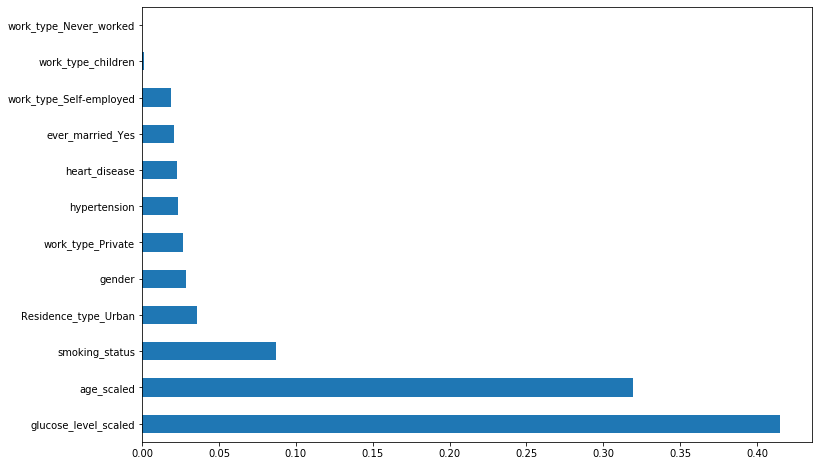

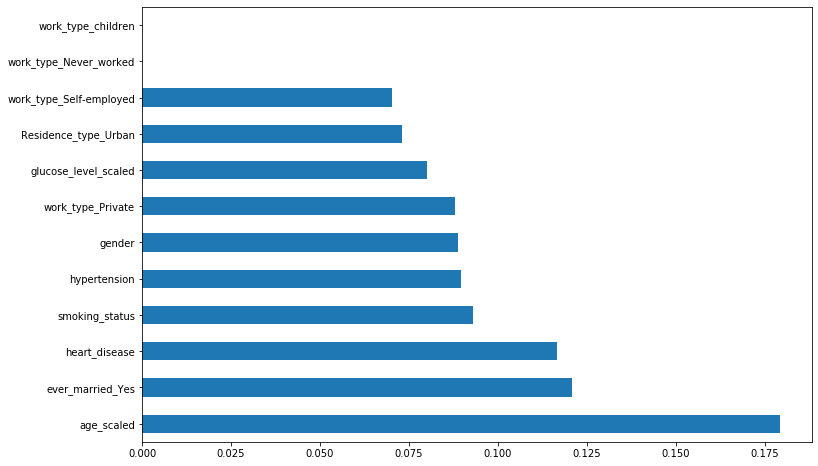

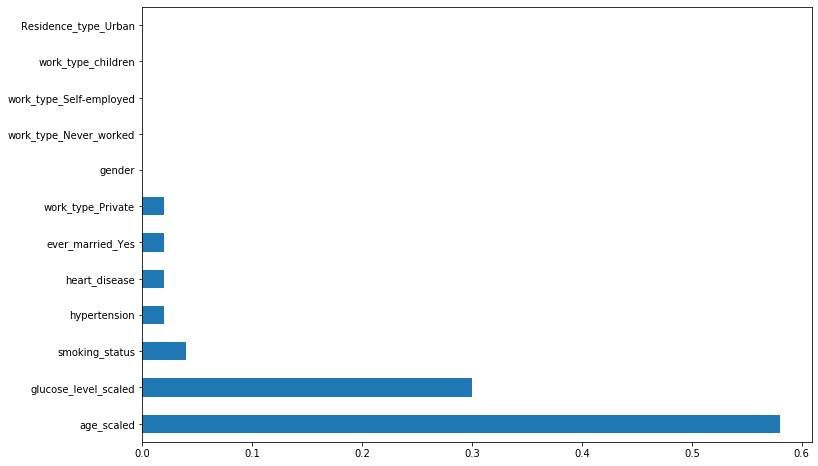

In [20]:
#Feature importance 
for model in [rf_model,xgb_model,ada_classifier]:
    plt.figure(figsize = (12,8))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(20).plot(kind='barh')
    plt.show()

The random forest and adaBoost Classifier showed that glucose_level were the most important features when the models werer predicting. 

All models were greatly affected by age. This makes sence as the older you are, the more you are suceptipble to various heart conditions 

In [45]:
check = data.groupby(['age'])['stroke'].sum().sort_values(ascending=False)

In [46]:
check

age
78.00    21
80.00    17
79.00    17
81.00    14
57.00    11
         ..
16.00     0
15.00     0
13.00     0
12.00     0
0.08      0
Name: stroke, Length: 104, dtype: int64

In [78]:
x_axis = np.array(check.index)

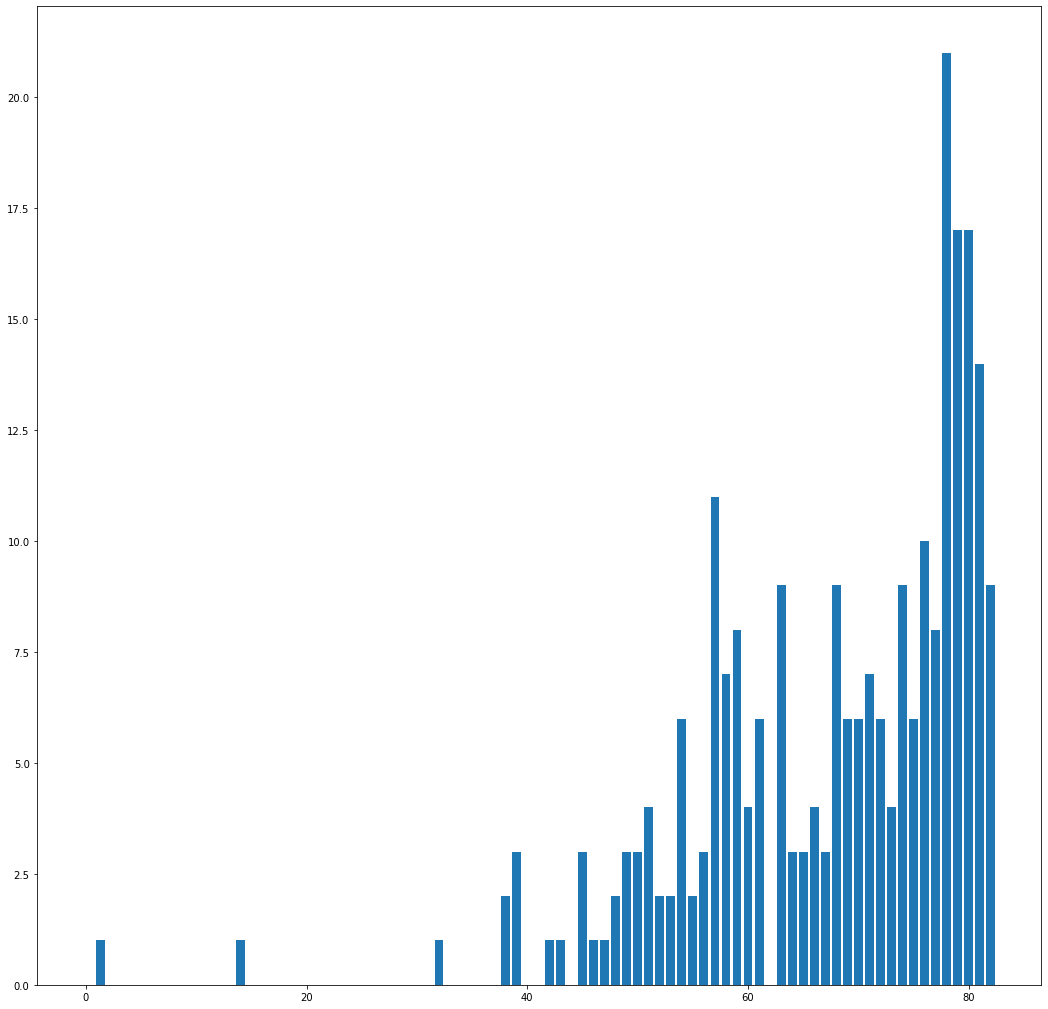

In [79]:
plt.figure(figsize = (18,18))
plt.bar(x_axis,check)
plt.show()

The graph above shows that the older somone is, the higher their chances of getting a stroke

In [1]:
#Roc curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)

NameError: name 'roc_curve' is not defined

In [85]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

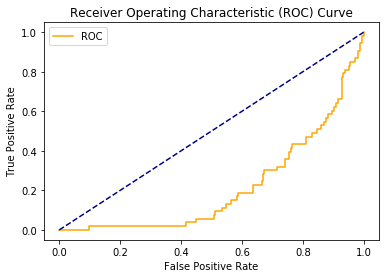

In [20]:
plot_roc_curve(fpr,tpr)

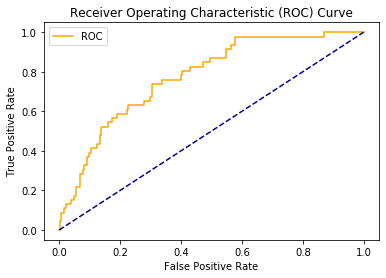

In [86]:
#Roc curve
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, ytest_pred_log[:,1])
plot_roc_curve(fpr_log, tpr_log)


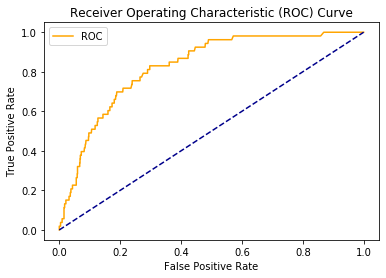

In [36]:
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, ytest_pred_ada[:,1])
plot_roc_curve(fpr_ada, tpr_ada)

## Overall 

- AdaBoostClassifier and Logistic regression produced the most accurate models 
- age is the most significant factor 

In [ ]:
https://www.kaggle.com/kevinnwu/stroke-eda-using-seaborn-and-plotly

In [ ]:
#Analyse 2 items at once, could be useful 

In [ ]:
#I should try to make sure I know how to use a) subplots, b)combining to columns to see how one feirs with regards to another. 
#But this is for binary items 
fig, ax = plt.subplots(1,2, figsize=(10, 6), sharey=True)
sns.boxplot(x='gender', y='age', data=df[df['hypertension']==1], ax=ax[0])#when hyper.. = 1, then plot the relevant features
ax[0].set(xlabel=None, title='Hypertension')
sns.boxplot(x='gender', y='age', data=df[df['heart_disease']==1], ax=ax[1])
ax[1].set(xlabel=None, ylabel=None, title='Heart Disease')
fig.tight_layout()

[Text(0.5, 0, ''), Text(0.5, 1.0, 'stroke')]

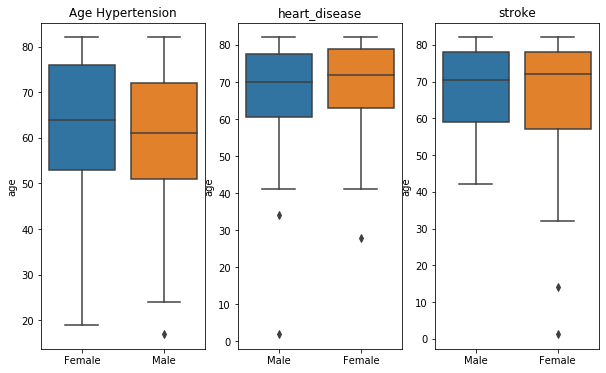

In [16]:
fig, ax = plt.subplots(1,3, figsize = (10,6))
sns.boxplot(x='gender',y='age', data=data[data['hypertension']==1], ax=ax[0])#first subplot
ax[0].set(xlabel = None, title = 'Age Hypertension')
sns.boxplot(x='gender',y='age',data=data[data['heart_disease']==1], ax=ax[1])#Note can look into a dataset like this 
ax[1].set(xlabel = None, title = 'heart_disease')
sns.boxplot(x='gender',y='age', data = data[data['stroke']==1],ax=ax[2])
ax[2].set(xlabel = None, title = 'stroke')

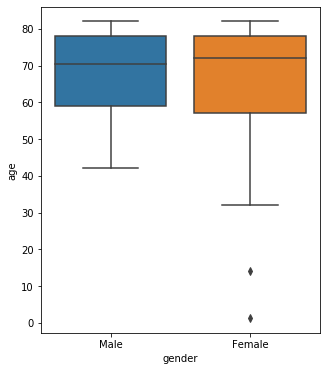

In [18]:
plt.figure(figsize = (5,6))
sns.boxplot(x='gender',y='age', data = data[data['stroke']==1])

In [5]:
stroke_df = data[data['stroke']==1]

In [6]:
stroke_df_by_gender = stroke_df.groupby('gender').count()[['stroke']].reset_index()

In [21]:
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
male_stroke_df = stroke_df[stroke_df['gender']=='Male']
male_stroke_df = male_stroke_df.groupby(pd.cut(male_stroke_df["age"], np.arange(0, 100, 10),labels=labels)).size().reset_index(name = 'Stroke')
#Use pd.cut when you need to segment and sort data values into bins.
#.size() function count the number of elements along a given axis.
#note name = 'Stroke' gets the name of the column that is being generated 

In [27]:
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
female_stroke_df = stroke_df[stroke_df['gender']=='Female']
female_stroke_df = female_stroke_df.groupby(pd.cut(female_stroke_df["age"], np.arange(0, 100, 10),labels=labels)).size().reset_index(name = 'Stroke')
#Use pd.cut when you need to segment and sort data values into bins.
#.size() function count the number of elements along a given axis.
#note name = 'Stroke' gets the name of the column that is being generated

In [44]:
female_stroke_df['Stroke']

0     1
1     1
2     0
3     6
4     9
5    25
6    25
7    62
8    12
Name: Stroke, dtype: int64

In [42]:
gender_stroke['Male'] = male_stroke_df['Stroke']
gender_stroke['Female'] = [female_stroke_df['Stroke']]
gender_stroke

TypeError: list indices must be integers or slices, not str

NameError: name 'fig' is not defined

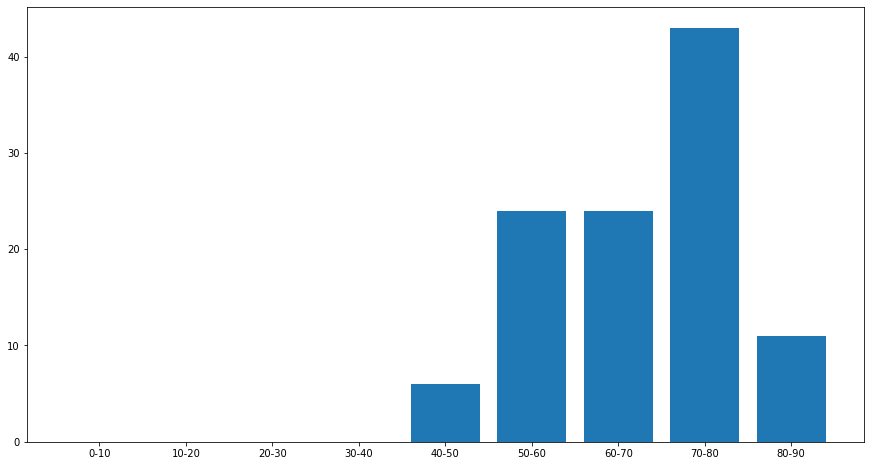

In [30]:
plt.figure(figsize = (15,8))
plt.bar(male_stroke_df['age'],male_stroke_df['Stroke'])
ax = fig.add_axes([0,1])
ax.bar(male_stroke_df['age'],female_stroke_df['Stroke'], color = 'b', width = 0.25)
ax.bar(female_stroke_df['age'], female_stroke_df['Stroke'],color = 'g', width = 0.25)
plt.show()

In [28]:
ax = fig.add_axes([0,0,1,1])

NameError: name 'fig' is not defined